# My Goal is Predicting Price Volatility: 

As the Model aims to predict price swings (like high-volatility periods); 

- Volume as a Feature: While high volume can sometimes signal strong buying or selling pressure, it's not always a direct predictor of price changes.

- Price: it's more likely that features like "Open," "High," and "Low" will play a more significant role.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# The CSV file is in the same folder as this notebook; providing the CSV file name is sufficient.
data_path = "../cleaned_data/gold-cleaned-2024-09-02.csv"
df =  pd.read_csv(data_path)

df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Percentage_Change_Close
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,0.000000
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,0.016064
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,-0.004671
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0,-0.004332
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0.0,-0.005801


In [4]:
df = df.drop(columns=["Adj_Close","Volume","Percentage_Change_Close","Date"])
df

,Open,High,Low,Close
0,273.899994,273.899994,273.899994,273.899994
1,274.799988,278.299988,274.799988,278.299988
2,277.000000,277.000000,277.000000,277.000000
3,275.799988,275.799988,275.799988,275.799988
4,274.200012,274.200012,274.200012,274.200012
...,...,...,...,...
5988,2430.000000,2436.000000,2422.899902,2422.899902
5989,2427.399902,2462.399902,2427.399902,2462.399902
5990,2472.899902,2473.100098,2454.800049,2454.800049
5991,2466.000000,2466.000000,2451.800049,2451.800049


In [5]:
df.dtypes


Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [6]:
df.describe()

,Open,High,Low,Close
count,5993.000000,5993.000000,5993.000000,5993.000000
mean,1134.055932,1139.698231,1128.151177,1133.988453
std,551.119394,554.180601,547.993625,551.119329
min,255.000000,256.100006,255.000000,255.100006
25%,625.500000,627.200012,622.599976,625.400024
50%,1227.199951,1233.500000,1222.500000,1227.199951
75%,1582.099976,1592.800049,1571.400024,1582.900024
max,2472.899902,2473.100098,2454.800049,2462.399902


## EDA Insights:

- Price Range: There is a significant price range, with a minimum of 255 and a maximum of 2462, indicating a volatile asset.
- Date Range: The data spans from 2000-08-30 to 2024-07-19, a considerable time period.
- Central Tendency: The mean and median prices are relatively close for "Open," "High," "Low," and "Close," suggesting a fairly symmetrical distribution.
- Standard Deviation: The standard deviations are around 550, indicating a good amount of variability in the prices.

In [7]:
# Correlation Calculation
correlation = df['Close'].corr(df['Open'])
print(f"Correlation between Close and Open: {correlation}")

Correlation between Close and Open: 0.9997871428750558


- Strong Relationship: The correlation being very close to 1 implies that the closing price is highly dependent on the opening price.

- Positive Direction: The positive sign means that, generally, as the opening price goes up, the closing price also tends to go up.

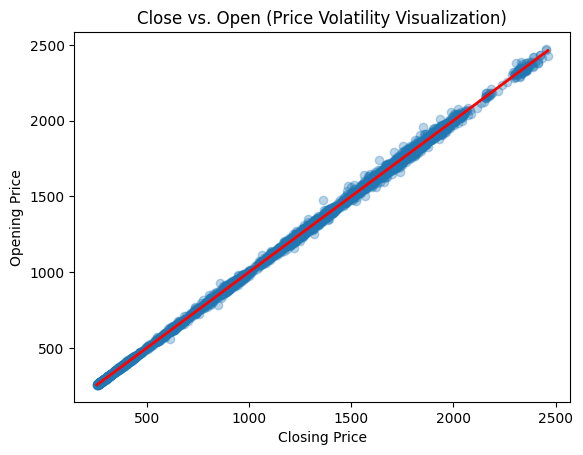

In [8]:
# Scatter Plot with Volume on the Y-axis and a Trendline
sns.regplot(x='Close', y='Open', data=df,  # Use sns.regplot() for trendline
            scatter_kws={'alpha': 0.3},  # Adjust point transparency
            line_kws={'color': 'red', 'lw': 2})  # Customize trendline color and width
plt.title('Close vs. Open (Price Volatility Visualization)')
plt.xlabel('Closing Price')
plt.ylabel('Opening Price')

plt.show()

In [9]:
# Correlation Calculation
correlation = df['Close'].corr(df['Low'])
print(f"Correlation between Close and Low: {correlation}")

Correlation between Close and Low: 0.9999062311611945


- Strong Relationship: The correlation being very close to 1 implies that the closing price is highly dependent on the opening price.

- Positive Direction: The positive sign means that, generally, as the opening price goes up, the closing price also tends to go up.

In [10]:
from datetime import datetime

# Get today's date
today = datetime.today().strftime("%Y-%m-%d")

output_path = f'../cleaned_data/gold-ml-{today}.csv'  

# Save the DataFrame to CSV
df.to_csv(output_path, index=False)  # Set index=False to avoid saving the row index